<img src="http://drive.google.com/uc?export=view&id=1tpOCamr9aWz817atPnyXus8w5gJ3mIts" width=500px>

Proprietary content. © Great Learning. All Rights Reserved. Unauthorized use or distribution prohibited.

## Problem Statement



# Samsung Internal SSD Reviews prediction

Rating predictions using reviews written by users can be a useful problem statement in E-commerce domain and can be used for recommending similar products that may interest users. The dataset in this problem statement comprises reviews pertaining to Samsung Internal SSD product specifically SAMSUNG 850 EVO 2.5" 250GB SATA III 3D NAND Internal Solid State Drive (SSD) MZ-75E250B/AM from the NewEgg Store website.  We will build a Natural Language processing model using Glove embeddings which is trained on reviews given by customers that have used the product and try to predict ratings given a new rating.




### Objective:
Given the reviews provided by customers, can you train a model that accurately predicts the corresponding rating of a review?

### Package version

- tensorflow==2.3.0
- scikit-learn==0.22.2.post1
- pandas==1.0.5
- numpy==1.18.5
- matplotlib==3.2.2
- google==2.0.3

### Data Dictionary 

- review_title : The Title for the customer review

- overall_review: The whole customer review details

- pros: The customer opinion about the good things in this product

- cons: The customer opinion about the bad things in this product

- ownership_pariod: How long the customer owned this product

- date: When the review was written

- rating_stars: The product rating from 1 to 5

- year: In which year the review was written

- month: In which month the review was written

- day: In which day the review was written

## Table of Content

1. Import Libraries

2. Setting options

3. Read Data

4. Data Analysis and Preparation

5. Model Building

6. Conclusion and Interpretation

7. Food for thought

## 1. Import Libraries

Let us start by mounting the drive

In [197]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Let us check for the version of installed tensorflow.

In [198]:
# used to supress display of warnings
import warnings

# os is used to provide a way of using operating system dependent functionality
# We use it for setting working folder
import os

# Pandas is used for data manipulation and analysis
import pandas as pd 

# Numpy is used for large, multi-dimensional arrays and matrices, along with mathematical operators on these arrays
import numpy as np

# Matplotlib is a data visualization library for 2D plots of arrays, built on NumPy arrays 
# and designed to work with the broader SciPy stack
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib import pyplot

# Seaborn is based on matplotlib, which aids in drawing attractive and informative statistical graphics.
import seaborn as sns
import tensorflow 
print(tensorflow.__version__)

2.6.0


## 2. Setting Options

In [199]:
# suppress display of warnings
warnings.filterwarnings('ignore')

# display all dataframe columns
pd.options.display.max_columns = None

# to set the limit to 3 decimals
pd.options.display.float_format = '{:.7f}'.format

# display all dataframe rows
pd.options.display.max_rows = None

## 3. Read Data

### Read the dataset and check top 5 rows

In [200]:
data=pd.read_csv("/content/drive/MyDrive/Sequential NLP/ssd_reviews.csv")
data.head()

,Unnamed: 0,review_title,overall_review,pros,cons,ownership_pariod,date,rating_stars,year,month,day
0,0,solid,buy it you will not regret this purchase,reliable fast silent cool running drive highly...,NaN,years,2019-12-05 12:58:58,5,2019,12,5
1,1,nice drive for price even cheaper by todays costs,good drive price,been running almost constantly since when i pu...,NaN,years,2019-11-01 08:25:45,5,2019,11,1
2,2,perfect,used this drive as my boot drive and only data...,good value decently fast good longevity,none so far,years,2019-10-27 17:05:49,5,2019,10,27
3,3,very snappy,os boots quicker os menus pop up quicker gamin...,noticeable improvement in os performance over ...,samsung magician software causes some games to...,years,2019-10-24 18:29:43,5,2019,10,24
4,4,worth the hype,this was the sdd that everyone said to get and...,NaN,NaN,years,2019-09-11 19:21:03,5,2019,9,11


### Check info of the dataset and write your findings

In [201]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2227 entries, 0 to 2226
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Unnamed: 0        2227 non-null   int64 
 1   review_title      2131 non-null   object
 2   overall_review    1448 non-null   object
 3   pros              2205 non-null   object
 4   cons              2216 non-null   object
 5   ownership_pariod  2159 non-null   object
 6   date              2227 non-null   object
 7   rating_stars      2227 non-null   int64 
 8   year              2227 non-null   int64 
 9   month             2227 non-null   int64 
 10  day               2227 non-null   int64 
dtypes: int64(5), object(6)
memory usage: 191.5+ KB


In [202]:
#FINDING: There are some null values in some of the columns(review_title,overall_review,pros,cons,ownership_pariod).

## 4.  Data Analysis and Preparation

### 4.1 Checking missing values
#### Check for missing values (along with the percentage of null values)

In [203]:
data.isna().sum()

Unnamed: 0            0
review_title         96
overall_review      779
pros                 22
cons                 11
ownership_pariod     68
date                  0
rating_stars          0
year                  0
month                 0
day                   0
dtype: int64

In [204]:
data.isna().sum()*100/data.shape[0]

Unnamed: 0          0.0000000
review_title        4.3107319
overall_review     34.9797934
pros                0.9878761
cons                0.4939380
ownership_pariod    3.0534351
date                0.0000000
rating_stars        0.0000000
year                0.0000000
month               0.0000000
day                 0.0000000
dtype: float64

### 4.2 Analyzing the target column (Rating_stars)

#### Check the value counts of 'rating_stars' and write your comments

In [205]:
data["rating_stars"].value_counts()

5    1756
4     181
1     153
3      77
2      60
Name: rating_stars, dtype: int64

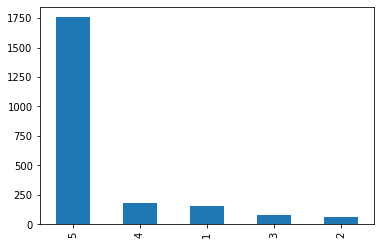

In [206]:
data["rating_stars"].value_counts().plot(kind="bar")

In [207]:
#FINDINGS: Clearly, the rating is biased towards the highest rating(5)

### 4.3 Let's analyze other features like year, month, and day etc.
#### Check value counts of 'year' and write your observations., Comment on the range of years, frequency of ratings in each year.

In [208]:
data["year"].value_counts()

2015    1006
2016     605
2017     370
2018     187
2019      46
2014      13
Name: year, dtype: int64

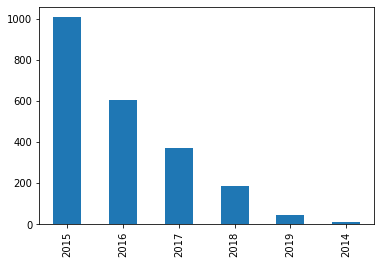

In [209]:
data["year"].value_counts().plot(kind="bar")

In [210]:
#OBSERVATION: Reviews are between 2014 & 2019

In [211]:
pd.DataFrame(data.groupby(["year","rating_stars"])["rating_stars"].count())

rating_stars
year rating_stars              
2014 4                        1
     5                       12
2015 1                       65
     2                       31
     3                       45
     4                      102
     5                      763
2016 1                       37
     2                       10
     3                       17
     4                       36
     5                      505
2017 1                       25
     2                       13
     3                        8
     4                       26
     5                      298
2018 1                       22
     2                        4
     3                        5
     4                       12
     5                      144
2019 1                        4
     2                        2
     3                        2
     4                        4
     5                       34

In [212]:
pd.DataFrame(data['day'].value_counts()).sort_index()

,day
1,65
2,58
3,87
4,88
5,58
6,65
7,75
8,82
9,64
10,84


#### Check mean rating for each year and write your findings

In [213]:
pd.DataFrame(data.groupby(["year"]).mean()["rating_stars"])

,rating_stars
year,
2014,4.9230769
2015,4.4582505
2016,4.5900826
2017,4.5108108
2018,4.3475936
2019,4.3478261


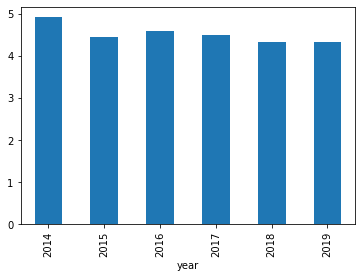

In [214]:
data.groupby(["year"]).mean()["rating_stars"].plot(kind="bar")

#### Check value counts of 'month' and write your observations. Comment on the frequency of ratings and discuss if the rating count and mean rating is higher/low on certain months.

In [215]:
pd.DataFrame(data['month'].value_counts()).sort_index()

,month
1,221
2,239
3,234
4,205
5,158
6,140
7,144
8,119
9,157
10,141


In [216]:
data['month'].value_counts().sort_index()

1     221
2     239
3     234
4     205
5     158
6     140
7     144
8     119
9     157
10    141
11    191
12    278
Name: month, dtype: int64

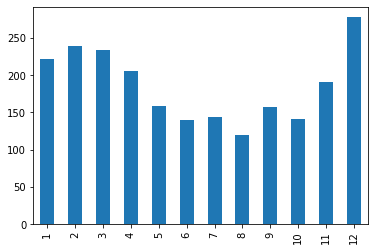

In [217]:
data['month'].value_counts().sort_index().plot(kind='bar')

In [218]:
#FINDINGS: Number of ratings are relatively fewer between the months 5 and 10

In [219]:
pd.DataFrame(data.groupby(["month","rating_stars"])["rating_stars"].count())

rating_stars
month rating_stars              
1     1                        6
      2                        7
      3                        8
      4                       18
      5                      182
2     1                       20
      2                        9
      3                        6
      4                       23
      5                      181
3     1                       12
      2                        3
      3                        9
      4                       16
      5                      194
4     1                       17
      2                        6
      3                        8
      4                       17
      5                      157
5     1                       13
      2                        5
      3                        4
      4                       12
      5                      124
6     1                        5
      2                        7
      3                        3
      4                       15
      5                      110
7     1                        4
      2                        1
      3                        4
      4                        7
      5                      128
8     1                       10
      3                        5
      4                       12
      5                       92
9     1                        5
      2                        6
      3                        9
      4                       16
      5                      121
10    1                       14
      2                        7
      3                        4
      4                       13
      5                      103
11    1                       18
      2                        3
      3                        6
      4                       10
      5                      154
12    1                       29
      2                        6
      3                       11
      4                       22
      5                      210

In [220]:
pd.crosstab(data['month'],data['rating_stars'])

rating_stars,1,2,3,4,5
month,,,,,
1,6,7,8,18,182
2,20,9,6,23,181
3,12,3,9,16,194
4,17,6,8,17,157
5,13,5,4,12,124
6,5,7,3,15,110
7,4,1,4,7,128
8,10,0,5,12,92
9,5,6,9,16,121


In [221]:
#FINDINGS: There are more ratings with 5. And the ratings for 2 & 3 are lower than 1, 4& 5

In [222]:
pd.DataFrame(data.groupby('month').mean()['rating_stars'])

,rating_stars
month,
1,4.6425339
2,4.4058577
3,4.6111111
4,4.4195122
5,4.4493671
6,4.5571429
7,4.7638889
8,4.4789916
9,4.5414013


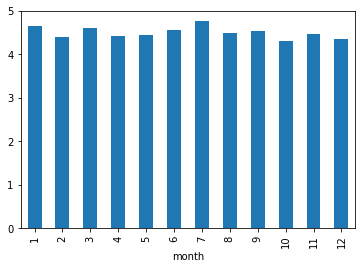

In [223]:
data.groupby('month').mean()['rating_stars'].plot(kind="bar")

### 4.4 Combine text features
#### Drop all the numerical features ['Unnamed: 0','date', 'year', 'month', 'day', 'ownership_pariod'] and ['rating_stars']

In [224]:
text_data=data.drop(columns=['Unnamed: 0','date', 'year', 'month', 'day', 'ownership_pariod','rating_stars'])
text_data.head()

,review_title,overall_review,pros,cons
0,solid,buy it you will not regret this purchase,reliable fast silent cool running drive highly...,NaN
1,nice drive for price even cheaper by todays costs,good drive price,been running almost constantly since when i pu...,NaN
2,perfect,used this drive as my boot drive and only data...,good value decently fast good longevity,none so far
3,very snappy,os boots quicker os menus pop up quicker gamin...,noticeable improvement in os performance over ...,samsung magician software causes some games to...
4,worth the hype,this was the sdd that everyone said to get and...,NaN,NaN


In [225]:
text_data.shape

(2227, 4)

#### Replace null values (NaN) with blanks

In [226]:
text_data.isna().sum()

review_title       96
overall_review    779
pros               22
cons               11
dtype: int64

In [227]:
text_data.fillna(" ",inplace=True)

In [228]:
text_data.isna().sum()

review_title      0
overall_review    0
pros              0
cons              0
dtype: int64

#### Join all text items in a row that have a space in between and Add a new column (with the newly created combined reviews) to the dataframe.

In [229]:
transformed_data = text_data.apply(lambda x :"".join(x),axis =1)

In [230]:
combined_data = pd.DataFrame(transformed_data,columns=['combined_review'])
combined_data.head()

,combined_review
0,solidbuy it you will not regret this purchaser...
1,nice drive for price even cheaper by todays co...
2,perfectused this drive as my boot drive and on...
3,very snappyos boots quicker os menus pop up qu...
4,worth the hypethis was the sdd that everyone s...


#### Check if there are any null values and drop NaN values if any

In [231]:
combined_data.isna().sum()

combined_review    0
dtype: int64

#### Calculate the length of each review and add it to the dataframe

In [232]:
combined_data['length'] = combined_data['combined_review'].apply(lambda x:len(x.split(" ")))
combined_data.head()

,combined_review,length
0,solidbuy it you will not regret this purchaser...,16
1,nice drive for price even cheaper by todays co...,39
2,perfectused this drive as my boot drive and on...,62
3,very snappyos boots quicker os menus pop up qu...,39
4,worth the hypethis was the sdd that everyone s...,29


#### Check summary stats of the length column

In [233]:
combined_data.describe()

,length
count,2227.0000000
mean,82.2752582
std,87.3063671
min,3.0000000
25%,28.0000000
50%,57.0000000
75%,106.0000000
max,1612.0000000


### 4.5 Analyzing and preparing the text data


#### Set the max length of each review to 25 since it results in faster training (however, you are free to change this)
#### Set max_features to 10000 and embedding size to 50

In [234]:
max_features = 10000
maxlen = 25
embedding_size = 50

#### Tokenize the cobined text data. You can use the Tokenizer from tensorflow.keras.preprocessing.text. Check the number of samples post tokenization.

In [235]:
tokenizer = tensorflow.keras.preprocessing.text.Tokenizer(num_words=max_features)

In [236]:
tokenizer.fit_on_texts(list(combined_data['combined_review']))
X=tokenizer.texts_to_sequences(combined_data['combined_review'])

In [237]:
X[19]

[3483, 2393, 708, 2, 68, 32, 1432, 98, 745, 27, 1629]

In [238]:
len(X)

2227

#### Pad the above tokenized reviews data save it as independent features. Use max_len for the same.

In [239]:
X=tensorflow.keras.preprocessing.sequence.pad_sequences(X,maxlen=maxlen)

In [240]:
y=np.asarray(data['rating_stars'])

#### Check the shape of X (padded tokenized review data) and y (rating_stars) data.

In [241]:
X.shape

(2227, 25)

In [242]:
y.shape

(2227,)

#### Check the total number of words in the dictionary (of tekenizer)

In [243]:
num_words= len(tokenizer.word_index) + 1
num_words

12194

### 4.6 Compute the glove embeddings. Use the provided txt file for the same.

#### Read the glove embeddings from the file provided titled ‘glove.6B.50d.txt’. And save it to a dictotionary having word and corresponding embedding vector.

In [244]:
path = '/content/drive/MyDrive/Sequential NLP'
EMBEDDING_FILE = path + '/glove.6B.50d.txt'
embeddings = {}
for o in open(EMBEDDING_FILE):
    word = o.split(" ")[0]
    # print(word)
    embd = o.split(" ")[1:]
    embd = np.asarray(embd, dtype='float32')
    # print(embd)
    embeddings[word] = embd

#### Create a weight matrix for words in the training docs

In [245]:
embedding_matrix = np.zeros((num_words, 50))

for word, i in tokenizer.word_index.items():
	embedding_vector = embeddings.get(word)
	if embedding_vector is not None:
		embedding_matrix[i] = embedding_vector

#### Check length of the embedding

In [246]:
len(embeddings.values())

400000

### 4.7 Target Feature:- One hot encode the target variable (rating_stars)

In [247]:
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder()
y_encoded=ohe.fit_transform(y.reshape(-1,1))

In [248]:
y_encoded=y_encoded.todense()
y_encoded

matrix([[0., 0., 0., 0., 1.],
        [0., 0., 0., 0., 1.],
        [0., 0., 0., 0., 1.],
        ...,
        [0., 0., 0., 0., 1.],
        [0., 0., 0., 0., 1.],
        [0., 0., 0., 0., 1.]])

### 4.8 Split the data into Train & Test sets

In [249]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X, y_encoded, test_size = 0.3, stratify = y_encoded)

## 5. Model building

### 5.1 Construct a neural network architecture using embedding and LSTM layers for building the rating prediction model.
- Use the num_words, embedding_size from the above tokenizer and embeddings respectively
- Use weights from the above embedding matrix
- Use input length as the maxlen
- Add LSTM layers

In [250]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Bidirectional, LSTM, Dense, Dropout, Flatten,BatchNormalization
from functools import partial

tf.keras.backend.clear_session()
model = Sequential()
model.add(Embedding(num_words, embedding_size, weights = [embedding_matrix], input_length=maxlen))
model.add(LSTM(128, return_sequences = True))
model.add(Flatten())
model.add(BatchNormalization())
model.add(Dense(512, activation='relu'))
model.add(BatchNormalization())
model.add(Dense(256, activation = 'relu'))
model.add(BatchNormalization())
model.add(Dense(128, activation = 'relu'))
model.add(BatchNormalization())
model.add(Dense(64, activation= 'relu'))
model.add(Dropout(0.5))
model.add(BatchNormalization())
model.add(Dense(5, activation="softmax"))


### 5.2 Compile the model using appropriate loss, optimizer, and accuracy metric

In [251]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [252]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 25, 50)            609700    
_________________________________________________________________
lstm (LSTM)                  (None, 25, 128)           91648     
_________________________________________________________________
flatten (Flatten)            (None, 3200)              0         
_________________________________________________________________
batch_normalization (BatchNo (None, 3200)              12800     
_________________________________________________________________
dense (Dense)                (None, 512)               1638912   
_________________________________________________________________
batch_normalization_1 (Batch (None, 512)               2048      
_________________________________________________________________
dense_1 (Dense)              (None, 256)               1

### 5.3 Fit the model

In [253]:
training_history = model.fit(X_train, y_train, batch_size=128, epochs=20, validation_data=(X_test, y_test))

Epoch 1/20
13/13 [==============================] - 6s 196ms/step - loss: 2.1180 - accuracy: 0.2599 - val_loss: 2.2146 - val_accuracy: 0.1450
Epoch 2/20
13/13 [==============================] - 2s 150ms/step - loss: 1.6024 - accuracy: 0.4031 - val_loss: 1.5519 - val_accuracy: 0.3318
Epoch 3/20
13/13 [==============================] - 2s 151ms/step - loss: 1.3016 - accuracy: 0.5533 - val_loss: 1.1519 - val_accuracy: 0.7922
Epoch 4/20
13/13 [==============================] - 2s 152ms/step - loss: 1.0920 - accuracy: 0.6412 - val_loss: 0.9680 - val_accuracy: 0.7892
Epoch 5/20
13/13 [==============================] - 2s 151ms/step - loss: 0.8311 - accuracy: 0.7715 - val_loss: 0.8798 - val_accuracy: 0.7892
Epoch 6/20
13/13 [==============================] - 2s 150ms/step - loss: 0.6517 - accuracy: 0.8306 - val_loss: 0.8323 - val_accuracy: 0.7892
Epoch 7/20
13/13 [==============================] - 2s 153ms/step - loss: 0.5321 - accuracy: 0.8703 - val_loss: 0.8187 - val_accuracy: 0.7892
Epoch 

### 5.4 Predict ratings for test data and check accuracy and confusion matrix

In [254]:
pred = model.predict(X_test.reshape(len(X_test),25))

In [255]:
y_test_inv = ohe.inverse_transform(y_test)
y_pred_inv = ohe.inverse_transform(np.around(pred))

In [256]:
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report
confusion_matrix(y_test_inv, y_pred_inv)

array([[  0,   0,   0,   0,  46],
       [  0,   0,   0,   0,  18],
       [  0,   0,   0,   0,  23],
       [  0,   0,   0,   0,  54],
       [  0,   0,   0,   0, 528]])

In [257]:
accuracy_score(y_test_inv, y_pred_inv)

0.7892376681614349

In [258]:
print(classification_report(y_test_inv, y_pred_inv))

              precision    recall  f1-score   support

           1       0.00      0.00      0.00        46
           2       0.00      0.00      0.00        18
           3       0.00      0.00      0.00        23
           4       0.00      0.00      0.00        54
           5       0.79      1.00      0.88       528

    accuracy                           0.79       669
   macro avg       0.16      0.20      0.18       669
weighted avg       0.62      0.79      0.70       669



### 5.5 Display plot of training and validation loss/accuracy wrt to epochs

Text(0.5, 1.0, 'Training and validation loss')

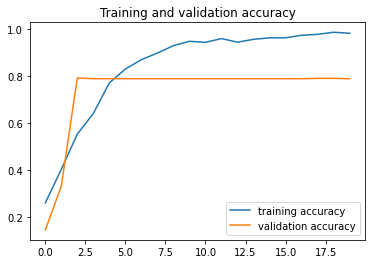

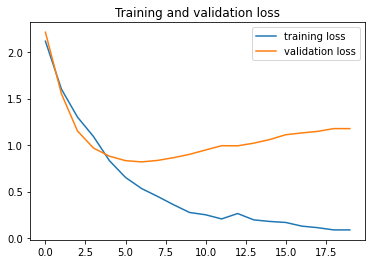

In [259]:
import matplotlib.pyplot as plt
accuracy      = training_history.history['accuracy']
val_accuracy  = training_history.history['val_accuracy']
loss     = training_history.history['loss']
val_loss = training_history.history['val_loss']

epochs   = range(len(accuracy)) # Get number of epochs

plt.plot  ( epochs, accuracy, label = 'training accuracy')
plt.plot  ( epochs, val_accuracy, label = 'validation accuracy')
plt.title ('Training and validation accuracy')
plt.legend(loc = 'lower right')
plt.figure()

plt.plot  ( epochs, loss, label = 'training loss')
plt.plot  ( epochs, val_loss, label = 'validation loss')
plt.legend(loc = 'upper right')
plt.title ('Training and validation loss')

## 6. Conclusion and Interpretation

In [260]:
#Precision is high for rating 5 which clearly says the data has learnt data with rating 5 as it has more data compared to other ratings. However the model is unreliable for predicting other ratings.
#The model clearly overfits as validation accuracy is much lesser than train accuracy.

## 7. Food for thought:

1.) Change activation function (try leaky_relu or tanh) and see if it helps in improving model performance with the dataset that is highly imbalanced

2.) Try with only the overall review feature and see if it leads to improvement in model performace

3.) Change the hyperparameters of the model and compare the results 

In [261]:
from keras.layers import LeakyReLU,BatchNormalization
tf.keras.backend.clear_session()
model1 = Sequential()
model1.add(Embedding(num_words, embedding_size, weights = [embedding_matrix], input_length=maxlen))
model1.add(LSTM(128, return_sequences = True))
model1.add(Flatten())
model1.add(BatchNormalization())
model1.add(Dense(512))
model1.add(LeakyReLU())
model1.add(BatchNormalization())
model1.add(Dense(256))
model1.add(LeakyReLU())
model1.add(BatchNormalization())
model1.add(Dense(128))
model1.add(LeakyReLU())
model1.add(BatchNormalization())
model1.add(Dense(64))
model1.add(LeakyReLU())
model1.add(Dropout(0.5))
model1.add(BatchNormalization())
model1.add(Dense(5, activation="softmax"))

model1.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model1.summary()

model1.fit(X_train, y_train, batch_size=128, epochs=20, validation_data=(X_test, y_test))

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 25, 50)            609700    
_________________________________________________________________
lstm (LSTM)                  (None, 25, 128)           91648     
_________________________________________________________________
flatten (Flatten)            (None, 3200)              0         
_________________________________________________________________
batch_normalization (BatchNo (None, 3200)              12800     
_________________________________________________________________
dense (Dense)                (None, 512)               1638912   
_________________________________________________________________
leaky_re_lu (LeakyReLU)      (None, 512)               0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 512)               2